In [2]:
%matplotlib inline
# Switch to ''%matplotlib ipympl' for interactive plots
import warnings
import imp
import pickle
import lmfit
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt

# Styling
warnings.filterwarnings("ignore")
plt.style.use('ggplot')

In [6]:
# Initialise wrapper and test datasets
wrapper_fpath = (r"..\mobius.py")
wr = imp.load_source('mobius', wrapper_fpath)
wr.initialize('..\..\Applications\Persist\persist.dll')

# Calibration functions
calib_fpath = (r"..\mobius_calib_uncert_lmfit.py")
cu = imp.load_source('mobius_calib_uncert_lmfit', calib_fpath)

In [7]:
#dataset = wr.DataSet.setup_from_parameter_and_input_files('..\..\Applications\IncaC\Boyne\persist_params_Boyne.dat', '..\..\Applications\IncaC\Boyne\incac_inputs_Boyne.dat')
dataset = wr.DataSet.setup_from_parameter_and_input_files('..\..\Applications\Persist\Tarland\persist_params_Tarland.dat', '..\..\Applications\Persist\Tarland\persist_inputs_Tarland.dat')

In [8]:
comparisons = [
    ('Reach flow', ['Coull'], 'observed Q', [])
]

In [9]:
index_short_name = {'All':'A', 'Quick':'q', 'Soilwater':'s', 'Groundwater':'g', 'Coull':'r'}

param_df = cu.get_double_parameters_as_dataframe(dataset, index_short_name=index_short_name)
pd.options.display.max_rows = 999
param_df

,name,short_name,unit,index,min_value,initial_value,max_value
0,Solver resolution,,dimensionless,(),0.001000,0.10,0.5
1,Snow multiplier,Msnow_A,dimensionless,"(All,)",0.500000,1.00,1.5
2,Snow melt temperature,Tsnow_A,°C,"(All,)",-4.000000,0.00,4.0
3,Degree day melt factor,DDFmelt_A,mm/°C/day,"(All,)",1.000000,3.00,4.0
4,Rain multiplier,Mrain_A,dimensionless,"(All,)",0.500000,1.00,1.5
5,Initial snow depth,,mm SWE,"(All,)",0.000000,0.00,9999.0
6,Degree day evapotranspiration,DDET_A,mm/°C/day,"(All,)",0.050000,0.20,0.2
7,Growing degree threshold,Tgrow_A,°C,"(All,)",-4.000000,-1.00,4.0
8,Canopy interception,canop_A,mm/day,"(All,)",0.000000,0.00,0.3
9,Initial water depth,,mm,"(Quick, All)",0.000000,0.00,9999.0



Goodness of fit for Reach flow [Coull] vs observed Q []:
Mean error (bias): -0.018562
Mean absolute error: 0.172020
Root mean square error: 0.260750
Nash-Sutcliffe coefficient: 0.803926
Number of observations: 1811



<AxesSubplot:xlabel='Date', ylabel='m3/s'>

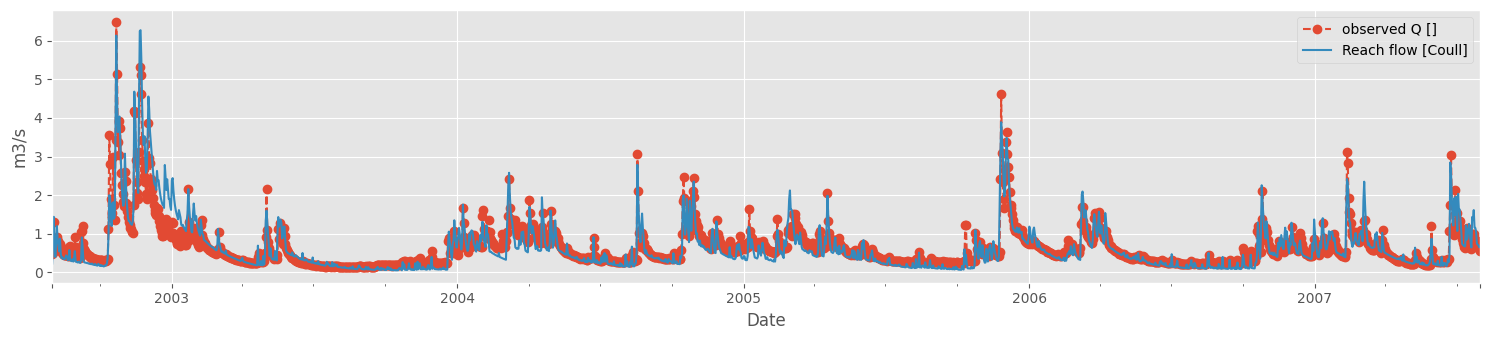

In [10]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

In [11]:
wanted_names = [
    'Msnow', 'Tsnow', 'DDFmelt', 'DDET', 'Tc_s', 'Tc_g', 'perc_A_s_s', 'perc_A_s_g',
]

calib_df = param_df[[any([sn.startswith(n) for n in wanted_names]) for sn in param_df['short_name']]].reset_index(drop=True)
calib_df

,name,short_name,unit,index,min_value,initial_value,max_value
0,Snow multiplier,Msnow_A,dimensionless,"(All,)",0.50,1.00,1.5
1,Snow melt temperature,Tsnow_A,°C,"(All,)",-4.00,0.00,4.0
2,Degree day melt factor,DDFmelt_A,mm/°C/day,"(All,)",1.00,3.00,4.0
3,Degree day evapotranspiration,DDET_A,mm/°C/day,"(All,)",0.05,0.20,0.2
4,Time constant,Tc_s_A,days,"(Soilwater, All)",1.00,3.00,9999.0
5,Time constant,Tc_g_A,days,"(Groundwater, All)",1.00,40.00,9999.0
6,Percolation matrix,perc_A_s_s,dimensionless,"(All, Soilwater, Soilwater)",0.00,0.35,1.0
7,Percolation matrix,perc_A_s_g,dimensionless,"(All, Soilwater, Groundwater)",0.00,0.65,1.0


In [12]:
params = cu.parameter_df_to_lmfit(calib_df)

params['perc_A_s_g'].set(expr = '1.0-perc_A_s_s')
params['Tc_s_A'].min = 1.0
params['Tc_s_A'].max = 10.0
params['Tc_g_A'].min = 30.0
params['Tc_g_A'].max = 200.0

params

name,value,initial value,min,max,vary,expression
Msnow_A,1.00000000,1.0,0.50000000,1.50000000,True,
Tsnow_A,0.00000000,0.0,-4.00000000,4.00000000,True,
DDFmelt_A,3.00000000,3.0,1.00000000,4.00000000,True,
DDET_A,0.20000000,0.2,0.05000000,0.20000000,True,
Tc_s_A,3.00000000,3.0,1.00000000,10.0000000,True,
Tc_g_A,40.0000000,40.0,30.0000000,200.000000,True,
perc_A_s_s,0.35000000,0.35,0.00000000,1.00000000,True,
perc_A_s_g,0.65000000,0.65,0.00000000,1.00000000,False,1.0-perc_A_s_s


In [13]:
%%time
mi, res = cu.minimize_residuals(params, dataset, comparisons, method='nelder', norm=False, skip_timesteps=365)
print('Optimization results\n')
lmfit.report_fit(res)
print('\n\nOptimized parameter values:\n')
res.params.pretty_print(precision=3)

cu.set_parameter_values(res.params, dataset)
dataset.write_parameters_to_file('optimized_params.dat')

Optimization results

[[Fit Statistics]]
    # fitting method   = Nelder-Mead
    # function evals   = 389
    # data points      = 1446
    # variables        = 7
    chi-square         = 47.1146154
    reduced chi-square = 0.03274122
    Akaike info crit   = -4937.06516
    Bayesian info crit = -4900.12927
##  Warning: uncertainties could not be estimated:
    this fitting method does not natively calculate uncertainties
    and numdifftools is not installed for lmfit to do this. Use
    `pip install numdifftools` for lmfit to estimate uncertainties
    with this fitting method.
[[Variables]]
    Msnow_A:     0.99901673 (init = 1)
    Tsnow_A:     0.00640329 (init = 0)
    DDFmelt_A:   2.96762098 (init = 3)
    DDET_A:      0.18128458 (init = 0.2)
    Tc_s_A:      3.76187794 (init = 3)
    Tc_g_A:      52.6381639 (init = 40)
    perc_A_s_s:  0.29385995 (init = 0.35)
    perc_A_s_g:  0.70614005 == '1.0-perc_A_s_s'


Optimized parameter values:

Name           Value      Min      Max  


Goodness of fit for Reach flow [Coull] vs observed Q []:
Mean error (bias): 0.022838
Mean absolute error: 0.161253
Root mean square error: 0.256229
Nash-Sutcliffe coefficient: 0.810667
Number of observations: 1811



<AxesSubplot:xlabel='Date', ylabel='m3/s'>

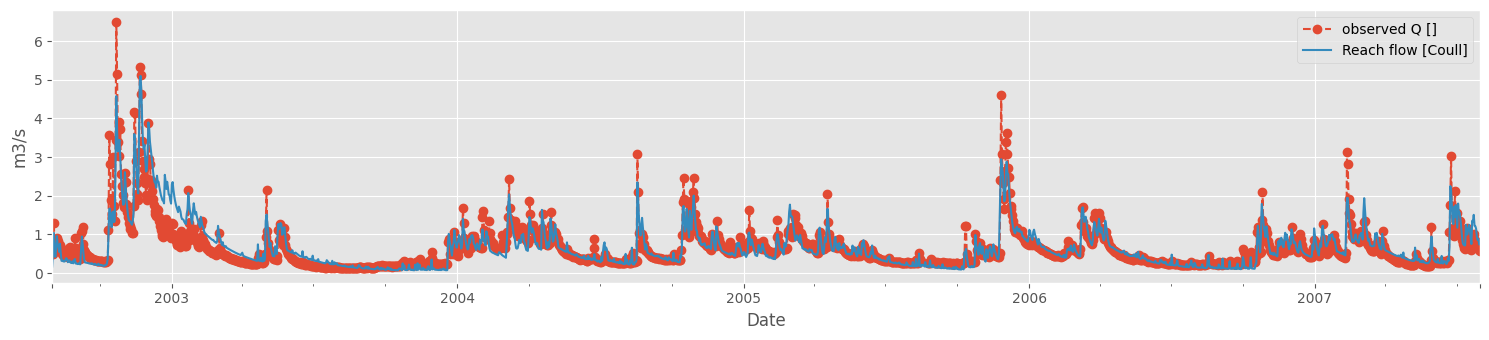

In [14]:
dataset.run_model()
cu.print_goodness_of_fit(dataset, comparisons)
cu.plot_objective(dataset, comparisons)

In [15]:
res.params.add('err_q', value = 0.5, min = 0.05, max = 3)

error_param_dict = {'Observed flow': 'err_q'}

res.params

name,value,initial value,min,max,vary,expression
Msnow_A,0.99901673,1.0,0.50000000,1.50000000,True,
Tsnow_A,0.00640329,0.0,-4.00000000,4.00000000,True,
DDFmelt_A,2.96762098,3.0,1.00000000,4.00000000,True,
DDET_A,0.18128458,0.2,0.05000000,0.20000000,True,
Tc_s_A,3.76187794,3.0,1.00000000,10.0000000,True,
Tc_g_A,52.6381639,40.0,30.0000000,200.000000,True,
perc_A_s_s,0.29385995,0.35,0.00000000,1.00000000,True,
perc_A_s_g,0.70614005,0.65,0.00000000,1.00000000,False,1.0-perc_A_s_s
err_q,0.50000000,0.5,0.05000000,3.00000000,True,


In [16]:
nworkers = 8
ntemps   = 1
nsteps   = 10000
nwalk    = 100
nburn    = 1000
thin     = 1
init_chains = 'uniform'
skip_timesteps = 365
result_path = r'pickled\\mcmc_results.pkl'
chain_plot_path = r'plots\\chains.png'
corner_plot_path = r'plots\\corner.png'

settings_dict = {'params':res.params,
                 'error_param_dict':error_param_dict,
                 'comparisons':comparisons,
                 'skip_timesteps':skip_timesteps,
                 'nworkers':nworkers,
                 'ntemps':ntemps,
                 'nsteps':nsteps,
                 'nwalk':nwalk,
                 'nburn':nburn,
                 'thin':thin,
                 'init_chains':init_chains,
                 'result_path':result_path,
                 'chain_path':chain_plot_path,
                 'corner_path':corner_plot_path,                 
                }

with open('pickled\\mcmc_settings.pkl', 'wb') as handle:
    pickle.dump(settings_dict, handle)

FileNotFoundError: [Errno 2] No such file or directory: 'pickled\\mcmc_settings.pkl'

In [17]:
%run -i persist_calib_uncert.py

RuntimeError: ERROR: Tried to open file "..\..\Applications\Persist\Haelva\persist_inputs_Haelva.dat", but was not able to.


<Figure size 640x480 with 0 Axes>

In [38]:
with open('pickled\\mcmc_results.pkl', 'rb') as handle:
    result = pickle.load(handle)
    
cu.set_parameter_values(result.params, dataset)
dataset.run_model()

dataset.write_parameters_to_file('mcmc_map_params.dat')

In [18]:
highest_prob = np.argmax(result.lnprob)
hp_loc = np.unravel_index(highest_prob, result.lnprob.shape)
mle_soln = result.chain[hp_loc]
print(highest_prob)
print(mle_soln)

9430
[3.12397846e+00 2.55676429e+00 1.55611877e-01 1.99544266e+00
 6.87352323e+01 1.48753151e-02 1.15521800e-04 7.94123316e-01
 3.77625619e-01]



Goodness of fit for Reach flow [Outlet] vs Observed discharge outlet []:
Mean error (bias): 0.771484
Mean absolute error: 4.025048
Root mean square error: 7.508794
Nash-Sutcliffe coefficient: 0.762004
Number of observations: 3557



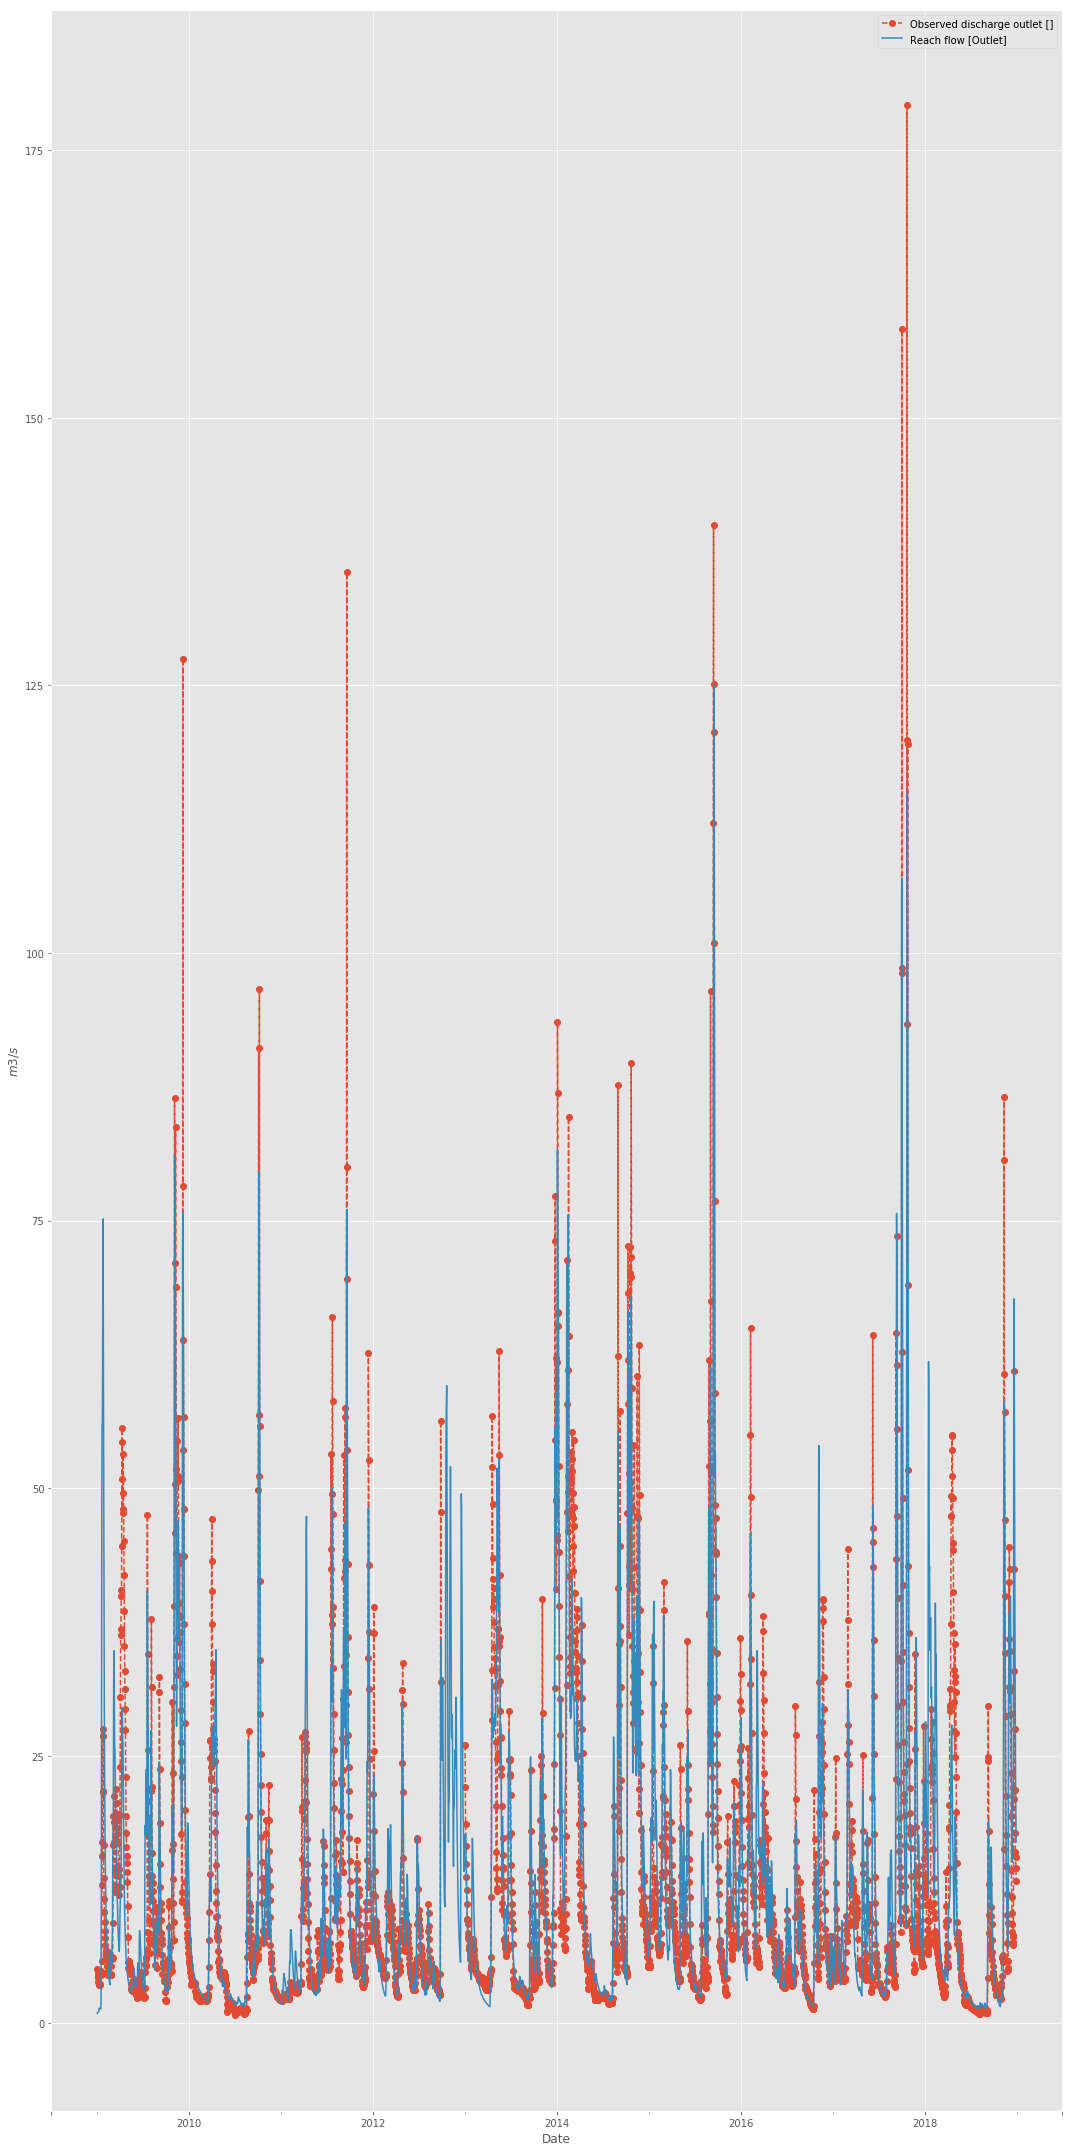

In [22]:
#par = result.params
#TODO: automate this! (we don't want to set the computed ones, but we need them to recompute based on what we set)
#par['T_melt'].set(value = mle_soln[0])
#par['DDfmelt'].set(value = mle_soln[1])
#par['DDfet'].set(value = mle_soln[2])
#par['T_s'].set(value = mle_soln[3])
#par['T_g'].set(value = mle_soln[4])
#par['a_V'].set(value = mle_soln[5])
#par['runoff_r'].set(value = mle_soln[6])
#par['runoff_s'].set(value = mle_soln[7])
#par['err_q']

#cu.set_parameter_values(par, dataset)
#dataset.run_model()
#cu.print_goodness_of_fit(dataset, comparisons)
#cu.plot_objective(dataset, comparisons)

#dataset.write_parameters_to_file('mcmc_map_params.dat')